In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.model_selection import train_test_split
from wordcloud import wordcloud, STOPWORDS , ImageColorGenerator, WordCloud
import seaborn as sns
import statsmodels

In [3]:
df_path = r'E:\Downloads\Requirements\Instagram.csv'
df = pd.read_csv(df_path, encoding='windows-1252')
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Here’s how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [4]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


## Analyze Instagram Reach

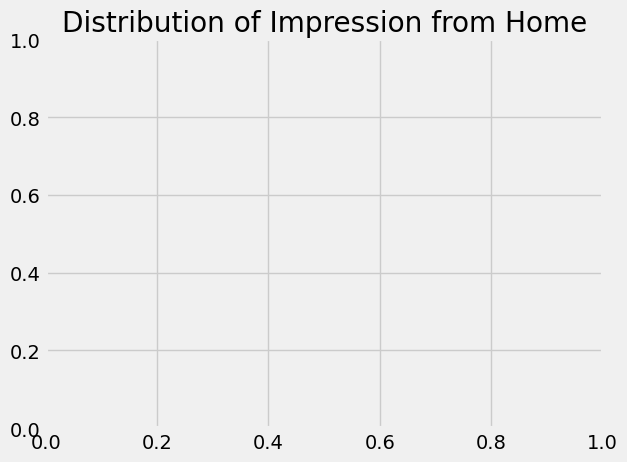

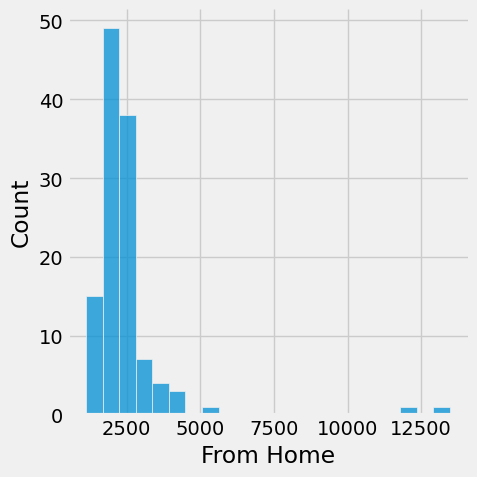

In [6]:
plt.Figure(figsize=(10,8))
plt.style.use('fivethirtyeight')
plt.title("Distribution of Impression from Home")
sns.displot(df['From Home'])
plt.show()

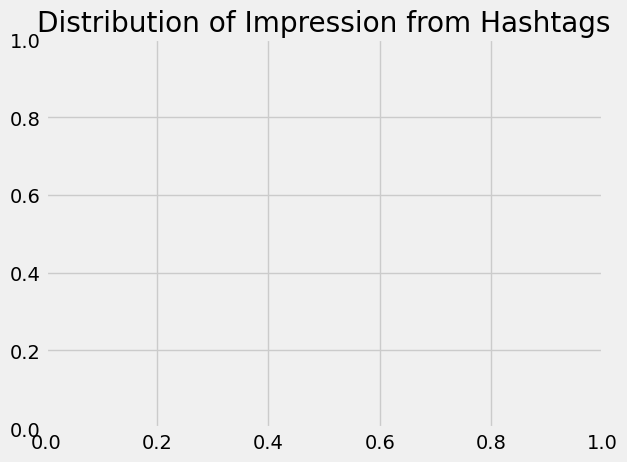

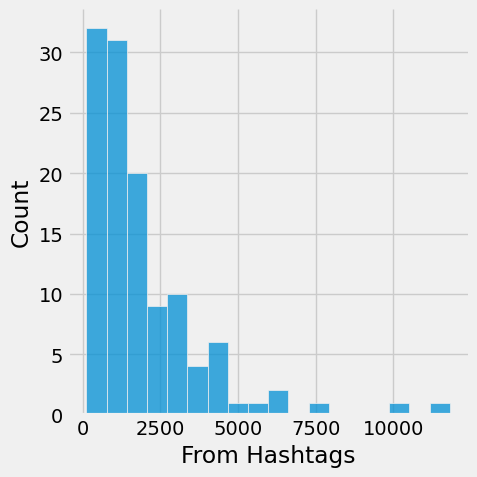

In [7]:
plt.Figure(figsize=(10,8))
plt.title("Distribution of Impression from Hashtags")
sns.displot(df['From Hashtags'])
plt.show()

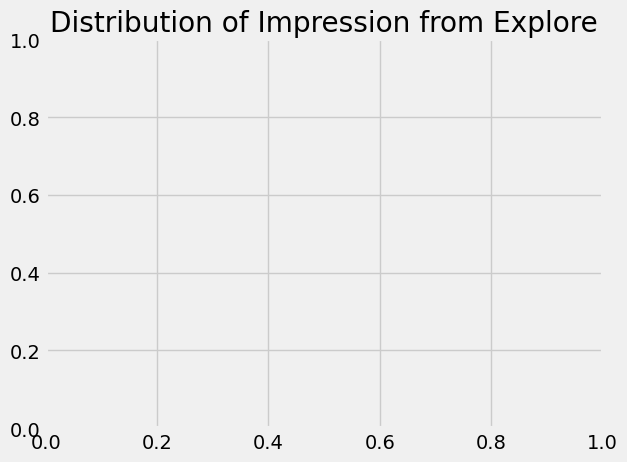

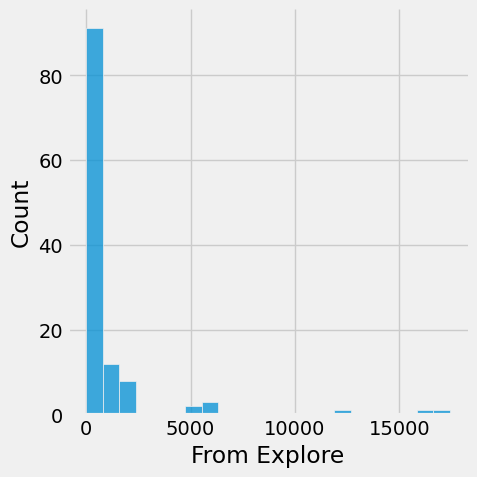

In [8]:
plt.Figure(figsize=(10,8))
plt.title("Distribution of Impression from Explore")
sns.displot(df['From Explore'])
plt.show()


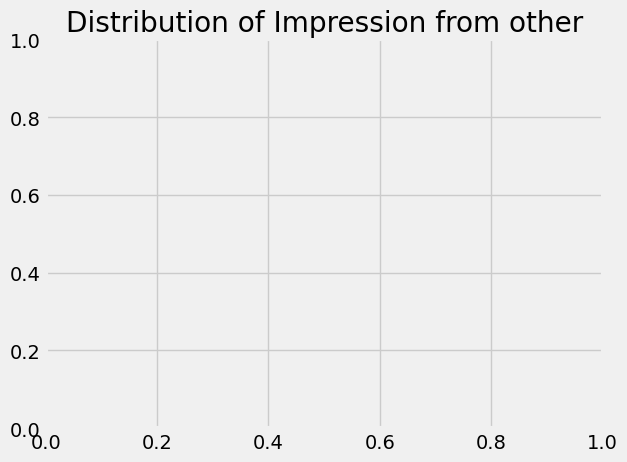

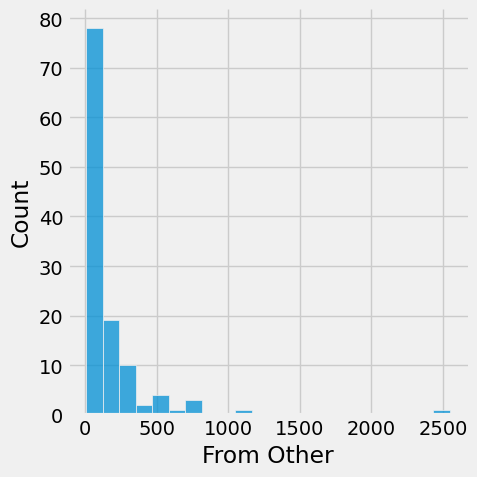

In [9]:
plt.Figure(figsize=(10,8))
plt.title("Distribution of Impression from other")
sns.displot(df['From Other'])
plt.show()

In [10]:
home = df['From Home'].sum()
hashtags = df['From Hashtags'].sum()
explore = df['From Explore'].sum()
other = df['From Other'].sum()

labels = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
values = [home, hashtags, explore, other]

fig = ex.pie(df, values=values, names=labels,title='Impression on Instagram Posts from various sources',
             hole=0.5)
fig.show()


## Analyzing Content

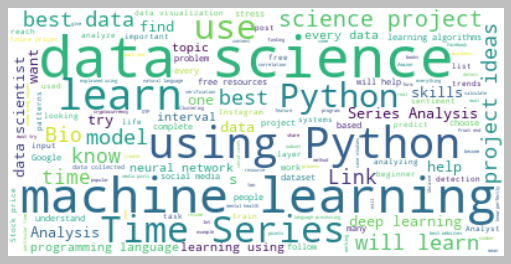

In [11]:
text = " ".join(i for i in df.Caption)
STOPWORDS = set(STOPWORDS)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="White").generate(text)
plt.style.use('classic')
plt.Figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
figure = ex.scatter(data_frame = df, x="Impressions",
                    y="Likes", size="Likes", trendline="ols", 
                    title = "Relationship Between Likes and Impressions")
figure.show()

In [15]:
figure = ex.scatter(data_frame = df, x="Impressions",
                    y="Comments", size="Comments", trendline="ols", 
                    title = "Relationship Between Comments and Total Impressions")
figure.show()

In [16]:
figure = ex.scatter(data_frame = df, x="Impressions",
                    y="Shares", size="Shares", trendline="ols", 
                    title = "Relationship Between Shares and Total Impressions")
figure.show()

In [18]:
conversion_rate = (df["Follows"].sum() / df["Profile Visits"].sum()) * 100
print(conversion_rate)

41.00265604249668


## Instagram Reach Prediction Model

In [19]:
x = np.array(df[['Likes', 'Saves', 'Comments', 'Shares', 
                   'Profile Visits', 'Follows']])
y = np.array(df["Impressions"])
xtrain, xtest, ytrain, ytest = train_test_split(x, y, 
                                                test_size=0.2, 
                                                random_state=42)

In [20]:
model = PassiveAggressiveRegressor()
model.fit(xtrain, ytrain)
model.score(xtest, ytest)

0.8828281737210804

In [21]:
# Features = [['Likes','Saves', 'Comments', 'Shares', 'Profile Visits', 'Follows']]
features = np.array([[282.0, 233.0, 4.0, 9.0, 165.0, 54.0]])
model.predict(features)

array([12881.12087476])